In [10]:
!pip install statsmodels
!pip install regex
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import regex as re 
from datetime import datetime 
import scipy as sp
import statsmodels.api as sm
df = pd.read_csv('com_prices.csv')
df.head()

,MONTH,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,1960M01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,715.40,206.1,2180.4,1631.0,260.8,35.27,83.5,0.9137
1,1960M02,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,728.19,203.7,2180.4,1631.0,244.9,35.27,83.5,0.9137
2,1960M03,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.94,210.3,2173.8,1631.0,248.7,35.27,83.5,0.9137
3,1960M04,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,723.11,213.6,2178.2,1631.0,254.6,35.27,83.5,0.9137
4,1960M05,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.75,213.4,2162.7,1631.0,253.8,35.27,83.5,0.9137


In [11]:
#use regex to tranform month column to month/year format


def monthyear(column):
    return re.sub(r'(\d{4})M(\d{2})', r'\2/\1', column)

df['MONTH'] = df['MONTH'].apply(monthyear)
df['MONTH'] = pd.to_datetime(df['MONTH'], format = '%m/%Y')
df.head()

,MONTH,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,1960-01-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,715.40,206.1,2180.4,1631.0,260.8,35.27,83.5,0.9137
1,1960-02-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,728.19,203.7,2180.4,1631.0,244.9,35.27,83.5,0.9137
2,1960-03-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.94,210.3,2173.8,1631.0,248.7,35.27,83.5,0.9137
3,1960-04-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,723.11,213.6,2178.2,1631.0,254.6,35.27,83.5,0.9137
4,1960-05-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.75,213.4,2162.7,1631.0,253.8,35.27,83.5,0.9137


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MONTH          761 non-null    datetime64[ns]
 1   CRUDE_PETRO    761 non-null    float64       
 2   CRUDE_BRENT    761 non-null    float64       
 3   CRUDE_DUBAI    761 non-null    float64       
 4   CRUDE_WTI      761 non-null    object        
 5   COAL_AUS       761 non-null    object        
 6   COAL_SAFRICA   761 non-null    object        
 7   NGAS_US        761 non-null    float64       
 8   NGAS_EUR       761 non-null    float64       
 9   NGAS_JP        761 non-null    object        
 10  iNATGAS        761 non-null    object        
 11  COCOA          761 non-null    float64       
 12  COFFEE_ARABIC  761 non-null    float64       
 13  COFFEE_ROBUS   761 non-null    float64       
 14  TEA_AVG        761 non-null    float64       
 15  TEA_COLOMBO    761 non-

In [13]:
def to_float(df):
    for i in list(df.columns):
        if i != 'MONTH':
            df[i] = pd.to_numeric(df[i], errors='coerce')
            df[i].fillna(0.0, inplace=True)
        return df

df = to_float(df)
df.head()

,MONTH,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,1960-01-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,715.40,206.1,2180.4,1631.0,260.8,35.27,83.5,0.9137
1,1960-02-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,728.19,203.7,2180.4,1631.0,244.9,35.27,83.5,0.9137
2,1960-03-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.94,210.3,2173.8,1631.0,248.7,35.27,83.5,0.9137
3,1960-04-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,723.11,213.6,2178.2,1631.0,254.6,35.27,83.5,0.9137
4,1960-05-01,1.63,1.63,1.63,…,…,…,0.14,0.404774,…,...,511.471832,11.42,684.75,213.4,2162.7,1631.0,253.8,35.27,83.5,0.9137


Sicne there are a lot of different commodities lets try to reduce the feature space
Average all the commodities like energy and coffee prices into a single column 


In [19]:
df['COAL_AUS'].value_counts()

COAL_AUS
…          120
39.5        19
38          17
31          16
33.75       15
          ... 
47.1         1
50.9375      1
52.75        1
52.375       1
160.48       1
Name: count, Length: 347, dtype: int64

<Axes: xlabel='MONTH', ylabel='GOLD'>

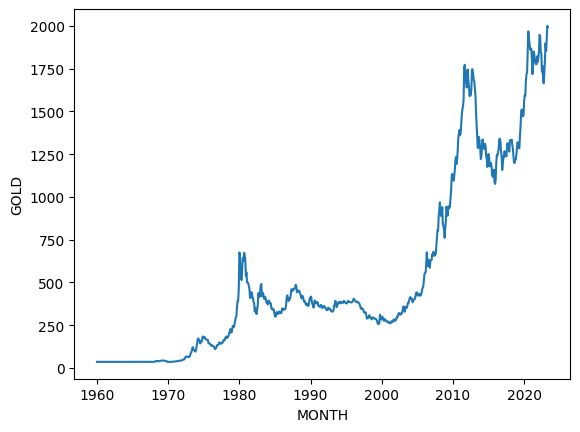

In [14]:
sns.lineplot(data = df, x = 'MONTH', y = 'GOLD')

<Axes: xlabel='MONTH', ylabel='GOLD'>

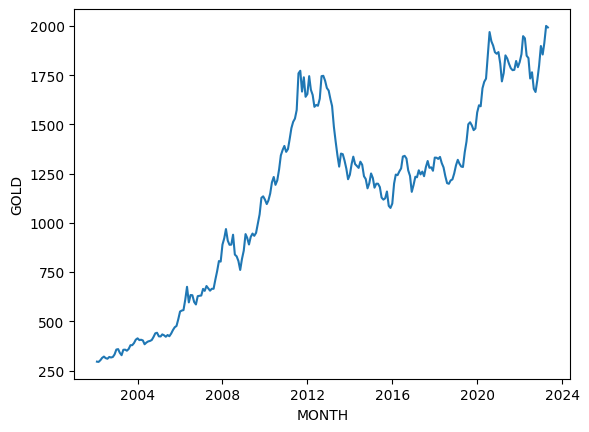

In [15]:
sns.lineplot(data = df[df['MONTH'] > '01-01-2002'], x = 'MONTH', y = 'GOLD') 

In [16]:
df.columns

Index(['MONTH', 'CRUDE_PETRO', 'CRUDE_BRENT', 'CRUDE_DUBAI', 'CRUDE_WTI',
       'COAL_AUS', 'COAL_SAFRICA', 'NGAS_US', 'NGAS_EUR', 'NGAS_JP', 'iNATGAS',
       'COCOA', 'COFFEE_ARABIC', 'COFFEE_ROBUS', 'TEA_AVG', 'TEA_COLOMBO',
       'TEA_KOLKATA', 'TEA_MOMBASA', 'COCONUT_OIL', 'GRNUT', 'FISH_MEAL',
       'GRNUT_OIL', 'PALM_OIL', 'PLMKRNL_OIL', 'SOYBEANS', 'SOYBEAN_OIL',
       'SOYBEAN_MEAL', 'RAPESEED_OIL', 'SUNFLOWER_OIL', 'BARLEY', 'MAIZE',
       'SORGHUM', 'RICE_05', 'RICE_25', 'RICE_A1', 'RICE_05_VNM',
       'WHEAT_US_SRW', 'WHEAT_US_HRW', 'BANANA_EU', 'BANANA_US', 'ORANGE',
       'BEEF', 'CHICKEN', 'LAMB', 'SHRIMP_MEX', 'SUGAR_EU', 'SUGAR_US',
       'SUGAR_WLD', 'TOBAC_US', 'LOGS_CMR', 'LOGS_MYS', 'SAWNWD_CMR',
       'SAWNWD_MYS', 'PLYWOOD', 'COTTON_A_INDX', 'RUBBER_TSR20',
       'RUBBER1_MYSG', 'PHOSROCK', 'DAP', 'TSP', 'UREA_EE_BULK', 'POTASH',
       'ALUMINUM', 'IRON_ORE', 'COPPER', 'LEAD', 'Tin', 'NICKEL', 'Zinc',
       'GOLD', 'PLATINUM', 'SILVER'],
      dtype='

In [17]:
energy = ['CRUDE_PETRO', 'CRUDE_BRENT', 'CRUDE_DUBAI', 'CRUDE_WTI',
       'COAL_AUS', 'COAL_SAFRICA', 'NGAS_US', 'NGAS_EUR', 'NGAS_JP', 'iNATGAS', 'COFFEE_ARABIC']

caffeine = ['COCOA', 'COFFEE_ARABIC', 'COFFEE_ROBUS', 'TEA_AVG', 'TEA_COLOMBO',
       'TEA_KOLKATA', 'TEA_MOMBASA', 'TOBAC_US']

oils = ['COCONUT_OIL', 'FISH_MEAL',
       'GRNUT_OIL', 'PALM_OIL', 'PLMKRNL_OIL','SOYBEAN_OIL',
       'SOYBEAN_MEAL', 'RAPESEED_OIL', 'SUNFLOWER_OIL']

grains = ['COCOA', 'GRNUT', 'SOYBEANS','BARLEY', 'MAIZE',
       'SORGHUM', 'RICE_05', 'RICE_25', 'RICE_A1', 'RICE_05_VNM',
       'WHEAT_US_SRW', 'WHEAT_US_HRW' ]

food = ['BANANA_EU', 'BANANA_US', 'ORANGE',
       'BEEF', 'CHICKEN', 'LAMB', 'SHRIMP_MEX', 'SUGAR_EU', 'SUGAR_US',
       'SUGAR_WLD']

industrial = ['LOGS_CMR', 'LOGS_MYS', 'SAWNWD_CMR',
       'SAWNWD_MYS', 'PLYWOOD', 'COTTON_A_INDX', 'RUBBER_TSR20',
       'RUBBER1_MYSG']

metals = ['PHOSROCK', 'DAP', 'TSP', 'UREA_EE_BULK', 'POTASH',
       'ALUMINUM', 'IRON_ORE', 'COPPER', 'LEAD', 'Tin', 'NICKEL', 'Zinc',
       'GOLD', 'PLATINUM', 'SILVER'] 



In [18]:
ecorr = df[energy].corr()
ccorr = df[caffeine].corr()
ocorr = df[oils].corr()
gcorr = df[grains].corr()
fcorr = df[food].corr()
icorr = df[industrial].corr()
mcorr = df[metals].corr()


ValueError: could not convert string to float: '…'

In [ ]:
df['CRUDE_WTI']

0          …
1          …
2          …
3          …
4          …
       ...  
756    78.11
757    76.84
758    73.37
759    79.44
760    71.59
Name: CRUDE_WTI, Length: 761, dtype: object

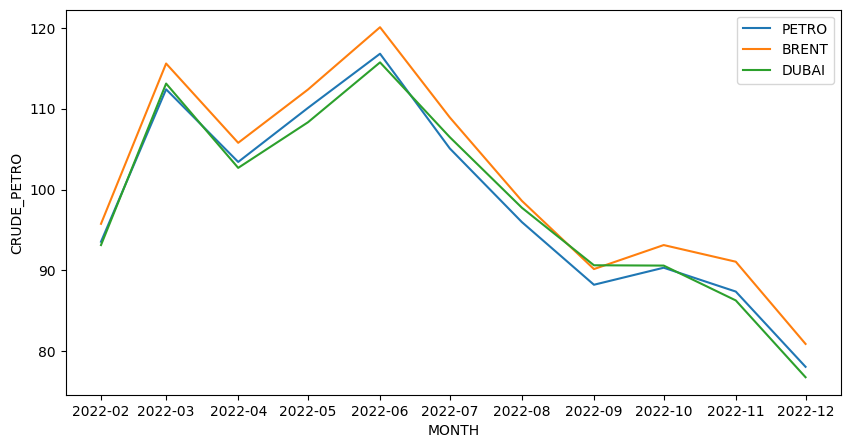

In [ ]:
plt.figure(figsize=(10,5))
limited_time = df[df['MONTH'] > '01-01-2022']
#df_sorted_wti = limited_time[limited_time['MONTH'] < '01-01-2023'].sort_values(by='CRUDE_WTI')
df_sorted_petro = limited_time[limited_time['MONTH'] < '01-01-2023'].sort_values(by='CRUDE_PETRO')
df_sorted_brent = limited_time[limited_time['MONTH'] < '01-01-2023'].sort_values(by='CRUDE_BRENT')
df_sorted_dubai = limited_time[limited_time['MONTH'] < '01-01-2023'].sort_values(by='CRUDE_DUBAI')
#sns.lineplot(data = df_sorted_wti, x = 'MONTH', y = 'CRUDE_WTI', label = 'WTI') 
sns.lineplot(data = df_sorted_petro, x = 'MONTH', y = 'CRUDE_PETRO', label = 'PETRO')
sns.lineplot(data = df_sorted_brent, x = 'MONTH', y = 'CRUDE_BRENT', label = 'BRENT')
sns.lineplot(data = df_sorted_dubai, x = 'MONTH', y = 'CRUDE_DUBAI', label = 'DUBAI')
plt.show()

In [ ]:
df1 = df.copy()
df1.drop('MONTH', axis = 1, inplace = True)
df1.head()